In [62]:
import numpy as np 
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.stattools as stats
import statsmodels.formula.api as sm
import statsmodels as sm1
import linearmodels as lm
import matplotlib.pyplot as plt 
import seaborn as sns

import hvplot.pandas 
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [63]:
df_price = pd.read_csv('DeFi_Price_Mathis.csv')
df_mc = pd.read_csv('DeFi_MktCap_Mathis.csv')
df_volume = pd.read_csv('DeFi_Volume_Mathis.csv')
df_mc['Unnamed: 0'] = pd.to_datetime(df_mc['Unnamed: 0'])
df_price['Unnamed: 0'] = pd.to_datetime(df_price['Unnamed: 0'])
df_volume['Unnamed: 0'] = pd.to_datetime(df_volume['Unnamed: 0'])
df_mc = df_mc.set_index('Unnamed: 0')
df_price = df_price.set_index('Unnamed: 0')
df_volume = df_volume.set_index('Unnamed: 0')

In [64]:
rt = np.log(df_price).diff()
rt.replace([np.inf, -np.inf], np.nan, inplace=True)
rt

,DCL,AST,WHEAT,QUICK,CAKE,OUSD,FOR,REQ,HZN,PTF,...,VEGA,HORD,UPS,AIR,BURGER,SURE,DIA,OGN,BSCX,NFTX
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16,0.02686,0.02788,0.00000,-0.03494,-0.00819,0.00044,0.03727,-0.01307,0.01142,0.26291,...,-0.00190,-0.02236,0.00117,-0.05786,-0.20173,0.24054,0.04844,0.02327,0.02790,0.19574
2022-07-17,-0.02156,-0.01427,0.00000,-0.06008,0.07200,0.00043,0.04655,0.03927,-0.00175,-0.25167,...,-0.00815,-0.00728,0.00623,-0.03269,-0.04287,-0.17408,0.01611,-0.04599,-0.00055,0.05032
2022-07-18,0.02418,0.01423,0.00000,0.32011,0.01640,0.00014,0.01528,0.07348,0.04915,0.05408,...,-0.00239,-0.00442,-0.00505,0.00637,0.02540,0.14594,0.03485,0.07739,0.04236,-0.09556


# Make DeFi index

In [4]:
defx = pd.read_excel('crix.xls')
df_index = defx.set_index(pd.to_datetime(defx['Date']))['CRIX']
rt_index = np.log(df_index).diff().dropna()
rt_index

Date
2018-03-19   -0.05239
2018-03-20    0.07214
2018-03-21   -0.01075
2018-03-22   -0.03840
2018-03-23   -0.00511
               ...   
2022-07-18    0.05884
2022-07-19    0.07199
2022-07-20    0.00201
2022-07-21   -0.00749
2022-07-22   -0.02936
Name: CRIX, Length: 1135, dtype: float64

In [6]:
defx = pd.read_excel('DeFiX.xlsx')
df_index = defx.set_index(pd.to_datetime(defx['Date']))['DeFiX']
rt_index = np.log(df_index).diff().dropna()
rt_index

Date
2017-05-02    0.00979
2017-05-03    0.00785
2017-05-04    0.04647
2017-05-05   -0.01325
2017-05-06    0.03203
               ...   
2021-12-10   -0.08387
2021-12-11   -0.05730
2021-12-12    0.02159
2021-12-13    0.01835
2021-12-14   -0.10100
Name: DeFiX, Length: 1688, dtype: float64

In [65]:
defx = pd.read_csv('DEFX.csv')
df_index = (defx
            .set_index(pd.to_datetime(defx['Timestamp']))
            ['Trade Close']
           )
df_index = df_index[::-1]
df_index

Timestamp
2019-08-26    95.88000
2019-08-27    94.21000
2019-08-28    95.61000
2019-08-29    85.37000
2019-08-30    87.58000
                ...   
2022-07-14   237.81000
2022-07-15   263.72000
2022-07-18   279.21000
2022-07-19   288.13000
2022-07-20   287.67000
Name: Trade Close, Length: 754, dtype: float64

In [66]:
df_index.hvplot()

:Curve   [Timestamp]   (Trade Close)

In [67]:
rt_index = np.log(df_index).diff().dropna()
rt_index.resample('W').sum().cumsum().hvplot() * rt_index.resample('M').sum().cumsum().hvplot() * rt_index.cumsum().hvplot()

:Overlay
   .Curve.Trade_Close.I   :Curve   [Timestamp]   (Trade Close)
   .Curve.Trade_Close.II  :Curve   [Timestamp]   (Trade Close)
   .Curve.Trade_Close.III :Curve   [Timestamp]   (Trade Close)

# Retrieve Rf from Fama French website

In [68]:
rf = pd.read_csv('FF_stocks_Rf.csv')
rf['Date'] = pd.to_datetime([str(i)[:4]+'-'+str(i)[4:6]+'-'+str(i)[6:] for i in rf['Date']])
rf = rf.set_index('Date')
rf = rf['RF'].resample('W').sum()
rf.loc['2019':].hvplot(x='Date', y='RF')

:Curve   [Date]   (RF)

<AxesSubplot:>

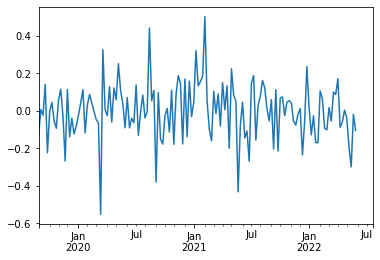

In [69]:
(rt_index.resample('W').sum() - rf.loc['2019-08-30':]).plot()

# Retrieve TVL Data

In [70]:
tvl = pd.read_csv('TVL_DefiLama.csv')
tvl['Unnamed: 0'] = pd.to_datetime(tvl['Unnamed: 0'])
tvl = tvl.set_index('Unnamed: 0')
tvl

,MKR,LDO,CRV,UNI,WBTC,CVX,CAKE,COMP,INST,MULTI,...,APT,JST,SUN,IZI,DFI,SUSHI,BOX,ACA,AAVE,QI
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,7702956605.90041,5057423071.98598,11321648.32822,37297564.63817,4876997030.81478,3473582955.60276,2835142177.49148,2582725547.89857,1607391370.53167,5299119.46098,...,9582193.95234,0.00000,826147361.96696,21864016.05430,371389113.19991,24007.39756,175150243.66000,162434263.49787,90108702.38606,3218112.34748
2022-07-16,7814349036.07512,5198758392.48731,11503164.18871,36675958.39560,4934269014.29235,3493994122.62187,2839127613.74129,2625808778.21111,1676746055.89507,5429914.96799,...,10694354.97067,0.00000,828702043.69260,21827028.42984,376165917.97005,23517.63445,177274392.26000,162501709.08595,89401013.37077,3167061.76816
2022-07-17,8117588582.83753,5800398898.12303,11328092.41987,38639372.45247,5073634955.45501,3619310149.12523,2885008280.50791,2875191885.73022,1805320190.82814,5857711.52731,...,11080802.13044,0.00000,839737877.32350,21846411.74775,385091005.25838,23845.94544,183467551.72000,173493125.30330,93807181.67238,3433596.48055


In [71]:
tvl.iloc[:,0:20].hvplot()

:NdOverlay   [Variable]
   :Curve   [Unnamed: 0]   (value)

In [72]:
# Finding common tickers in the TVL df and the MC df 

In [73]:
set_tvl = set(tvl.columns)
set_price = set(df_price.columns)
ff_defi = list(set_tvl.intersection(set_price))
ff_defi

['ARMOR',
 'KSP',
 'MTA',
 'BNC',
 'PERP',
 'HARD',
 'TRU',
 'LDO',
 'BABY',
 'DFD',
 'DODO',
 'FARM',
 'NOTE',
 'NETT',
 'MLN',
 'DF',
 'XVS',
 'PICKLE',
 'LFT',
 'SRM',
 'VALUE',
 'ACA',
 'FIS',
 'STRK',
 'WBTC',
 'UMA',
 'ROOK',
 'RIN',
 'INDEX',
 'IDLE',
 'KP3R',
 'FLX',
 'TIME',
 'BSW',
 'INJ',
 'PNT',
 'IZI',
 'KAVA',
 'VTX',
 'ANKR',
 'DHT',
 'VVS',
 'DYDX',
 'SNX',
 'LRC',
 'imBTC',
 'INST',
 'UNI',
 'OUSD',
 'DVF',
 'BAL',
 'TAROT',
 'NXM',
 'CVX',
 'ONX',
 'INV',
 'MET',
 'CREAM',
 'BELT',
 'FXS',
 'DFI',
 'BADGER',
 'RSR',
 'BANANA',
 'ALPACA',
 'RAY',
 'BNT',
 'CHESS',
 'CRV',
 'MKR',
 'SDT',
 'BEL',
 'AAVE',
 'RUNE',
 'JST',
 'WASP',
 'BUNNY',
 'ALCX',
 'FLM',
 'CAKE',
 'WING',
 'VSP',
 'SLND',
 'POOL',
 'COMP',
 'ACS',
 'QUICK',
 'LQTY',
 'AUTO',
 'RPL',
 'QI',
 'MMO',
 'RGT',
 'YFI',
 'FEI',
 'NFTX',
 'KEEP',
 'MDX',
 'HBB',
 'ALPHA',
 'SUSHI',
 'REN',
 'EPS',
 'BIFI']

In [74]:
# Finding defis for which the whole columns is null

In [75]:
mod_tvl = tvl[ff_defi]
to_remove_tvl = mod_tvl.columns[(mod_tvl.sum(axis=0) == 0)]

mod_mc = df_mc[ff_defi]
to_remove_mc = mod_mc.columns[(mod_mc.sum(axis=0) == 0)]

In [76]:
# Removing them from the selection 
print(len(ff_defi))
[ff_defi.remove(i) for i in to_remove_tvl]
[ff_defi.remove(i) for i in to_remove_mc]
print(len(ff_defi))

104
88


In [77]:
(tvl
 [ff_defi]
 .sum(axis=0)
 .sort_values(ascending=False)
 .iloc[:15]
 .hvplot
 .barh()
)

:Bars   [index]   (0)

In [78]:
# to use only for removing the largest defis 
#large_to_remove = (tvl
# [ff_defi]
# .sum(axis=0)
# .sort_values(ascending=False)
# .iloc[:9]
# .index
# .to_list()
#)

#for i in large_to_remove:
#    ff_defi.remove(i)
    
#ff_defi

# Make Fama-French

<AxesSubplot:xlabel='Unnamed: 0'>

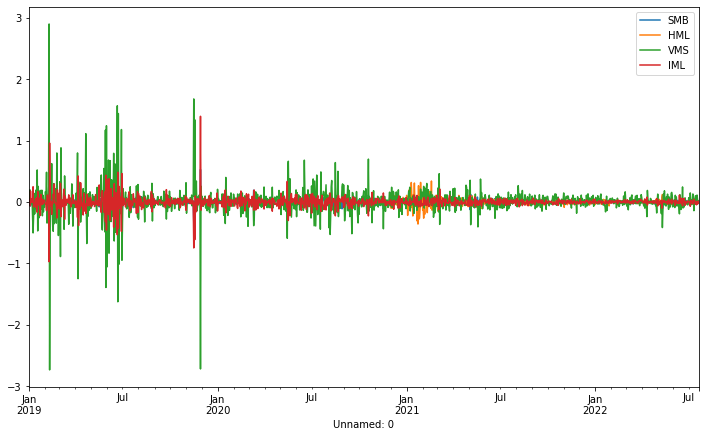

In [79]:
df_ff_final = pd.DataFrame(index=rt.loc['2019':].index, columns=['SMB', 'HML', 'VMS', 'IML'])
years =  ['2019','2020','2021','2022']
months =  ['0'+str(i) if i<10 else str(i) for i in range(1,13)] #Rebalancing monthly
dates = [i+'-'+j for i in years for j in months]
dates = dates[:-5] #We don't have the data for the last 5 months in 2022

for date in dates:
    
    # Big and Small based on mktcap
    ff_mktcap = pd.DataFrame(df_mc[ff_defi].loc[date].mean())
    ordered_list_mc = list(ff_mktcap[0].dropna().sort_values(ascending=False).index)
    small = ordered_list_mc[int(0.5*len(ordered_list_mc)):]
    big = ordered_list_mc[:int(0.5*len(ordered_list_mc))]

    ff_small = rt[small].loc[date].mean(axis=1)
    ff_big = rt[big].loc[date].mean(axis=1)
    ff_smb = ff_small-ff_big
    df_ff_final['SMB'].loc[ff_smb.index[0]:ff_smb.index[-1]] = ff_smb



    # High medium low based on the valuation ratio
    ff_ratio = pd.DataFrame(tvl[ff_defi].loc[date].mean()/df_mc[ff_defi].loc[date].mean())
    ff_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
    ff_ratio_list = list(ff_ratio.dropna().sort_values(by=0, ascending=False).index)

    high = ff_ratio_list[:int(0.3*len(ff_ratio_list))]
    medium = ff_ratio_list[int(0.3*len(ff_ratio_list)):int(0.7*len(ff_ratio_list))]
    low = ff_ratio_list[-int(0.3*len(ff_ratio_list)):]

    ff_growth = rt[low].loc[date].mean(axis=1)
    ff_value = rt[high].loc[date].mean(axis=1)
    ff_hml = ff_value- ff_growth
    
    df_ff_final['HML'].loc[ff_hml.index[0]:ff_hml.index[-1]] = ff_hml
    
    
    # High Volatility - Low Volatility
    ff_vol = pd.DataFrame(rt[ff_defi].loc[date].std())
    ff_vol_list = list(ff_vol.dropna().sort_values(by=0, ascending=False).index)

    small_vol = ff_vol_list[int(0.9*len(ff_vol_list)):]
    big_vol = ff_vol_list[:int(0.1*len(ff_vol_list))]

    ff_vms = rt[big_vol].loc[date].mean(axis=1) - rt[small_vol].loc[date].mean(axis=1)#vms = Volatile Minus Stable

    df_ff_final['VMS'].loc[ff_vms.index[0]:ff_vms.index[-1]] = ff_vms
    
    
    # Illiquid minus liquid IML
    ff_liq_rt = pd.DataFrame(abs(rt[ff_defi].loc[date]))
    ff_liq_volume = pd.DataFrame(df_volume[ff_defi].loc[date])
    ff_liq = ff_liq_rt/ff_liq_volume
    ff_liq = ff_liq.mean(axis=0)
    ff_liq_list = list(ff_liq.dropna().sort_values(ascending=False).index)


    illiq = ff_liq_list[int(0.2*len(ff_liq_list)):]
    liq = ff_liq_list[:int(0.2*len(ff_liq_list))]

    ff_iml = rt[illiq].loc[date].mean(axis=1) - rt[liq].loc[date].mean(axis=1)
    
    df_ff_final['IML'].loc[ff_iml.index[0]:ff_iml.index[-1]] = ff_iml
    


df_ff_final.plot(figsize=(12,7))

In [80]:
ff = df_ff_final[['SMB', 'HML']].resample('W').sum()
ff['Market'] = rt_index.resample('W').sum() #- rf.loc['2019-08-30':]  #Only if excess returns
ff[ff_defi] = rt[ff_defi].loc['2019':].resample('W').sum()
ff

,SMB,HML,Market,ARMOR,KSP,MTA,BNC,PERP,HARD,TRU,...,YFI,FEI,NFTX,KEEP,MDX,ALPHA,SUSHI,REN,EPS,BIFI
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2019-01-06,-0.01719,0.00000,NaN,0.00000,0.00000,0.00000,-0.01875,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14073,0.00000,0.00000
2019-01-13,-0.09507,0.00000,NaN,0.00000,0.00000,0.00000,-0.01481,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.27325,0.00000,0.00000
2019-01-20,-0.07207,0.00000,NaN,0.00000,0.00000,0.00000,0.01533,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06213,0.00000,0.00000
2019-01-27,0.08612,0.00000,NaN,0.00000,0.00000,0.00000,-0.07360,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00758,0.00000,0.00000
2019-02-03,0.02827,0.00000,NaN,0.00000,0.00000,0.00000,0.03219,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.09559,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,0.01082,-0.02940,0.20125,0.08497,-0.12268,0.11761,-0.00769,0.22894,0.09040,0.24344,...,0.30549,-0.00834,0.10129,0.20298,0.06518,0.11919,0.02620,0.10050,-0.01921,0.10473
2022-07-03,0.03220,-0.01204,-0.11906,-0.10325,-0.04863,-0.12995,0.03625,-0.07523,-0.00860,-0.03999,...,-0.09583,0.00261,0.01954,-0.10061,-0.00447,-0.08758,-0.03490,0.02214,-0.05444,-0.13345
2022-07-10,0.04715,0.02767,0.13241,0.12154,0.07949,0.05504,0.05266,0.10702,0.08654,0.14064,...,0.06400,0.03183,0.10062,0.02171,0.00251,0.08421,0.06843,0.21243,0.12466,0.08833


In [81]:
ff = ff.fillna(0)

In [82]:
ff[['Market', 'HML', 'SMB']].cumsum().hvplot()

:NdOverlay   [Variable]
   :Curve   [Unnamed: 0]   (value)

In [83]:
for i in ff_defi: 
    try:
        result = sm.ols(formula= i +" ~ Market + SMB + HML + VMS + IML", data=ff).fit()
        print(result.summary())
    except:
        pass

# Get correlation between risk factors

In [84]:
from scipy.stats import pearsonr

rho = ff[['Market', 'HML', 'SMB']].corr()
pval = ff[['Market', 'HML', 'SMB']].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,Market,HML,SMB
Market,1.0***,-0.076,0.066
HML,-0.076,1.0***,0.151**
SMB,0.066,0.151**,1.0***


In [85]:
corr_table = rho.round(3).astype(str) + p
print(corr_table.to_latex(bold_rows=True, caption='Correlation of factors'))

\begin{table}
\centering
\caption{Correlation of factors}
\begin{tabular}{llll}
\toprule
{} &  Market &      HML &      SMB \\
\midrule
\textbf{Market} &  1.0*** &   -0.076 &    0.066 \\
\textbf{HML   } &  -0.076 &   1.0*** &  0.151** \\
\textbf{SMB   } &   0.066 &  0.151** &   1.0*** \\
\bottomrule
\end{tabular}
\end{table}



# Estimate initial Risk Premia

In [86]:
sml_df = pd.DataFrame(index=ff_defi, columns =['Exp_Ret', 'Market', 'SMB', 'HML', 'R2', 'R2_CAPM'])
for i in ff_defi: 
    try:
        result = sm.ols(formula= i +" ~ Market + SMB + HML", data=ff).fit()
        sml_df['Exp_Ret'][i] = rt[i].mean()*100
        sml_df['Market'][i] = result.params[1]
        sml_df['SMB'][i] = result.params[2]
        sml_df['HML'][i] = result.params[3]
        #sml_df['VMS'][i] = result.params[4]
        #sml_df['IML'][i] = result.params[4]
        sml_df['R2'][i] = result.rsquared_adj
        
        
        result_capm = sm.ols(formula= i +" ~ Market", data=ff).fit()
        sml_df['R2_CAPM'][i] = result_capm.rsquared_adj
    except:
        pass
sml_df.head()

,Exp_Ret,Market,SMB,HML,R2,R2_CAPM
ARMOR,-0.73432,0.44784,0.06857,0.03885,0.16489,0.17100
KSP,-0.18967,0.31110,0.14431,0.33367,0.07527,0.04276
MTA,-0.40203,0.56427,0.12757,0.08693,0.16016,0.16230
BNC,-0.16479,-0.04694,-0.01784,0.02744,-0.00502,0.00402
PERP,-0.10290,0.50347,0.00342,0.03489,0.15869,0.16736


R2        0.13134
R2_CAPM   0.11883
dtype: float64


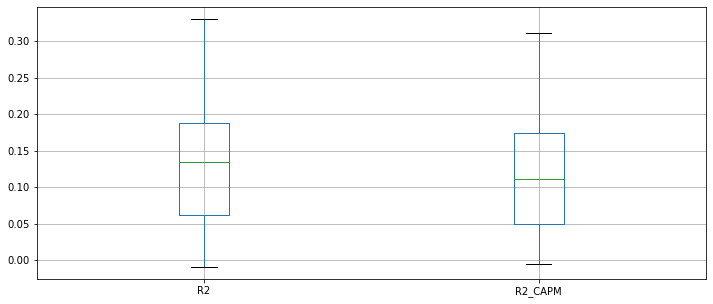

In [87]:
sml_df['Market'] = sml_df['Market'].astype(float)
sml_df['SMB'] = sml_df['SMB'].astype(float)
sml_df['HML'] = sml_df['HML'].astype(float)
#sml_df['VMS'] = sml_df['VMS'].astype(float)
#sml_df['IML'] = sml_df['IML'].astype(float)
sml_df['Exp_Ret'] = sml_df['Exp_Ret'].astype(float)
sml_df['R2'] = sml_df['R2'].astype(float)
sml_df['R2_CAPM'] = sml_df['R2_CAPM'].astype(float)
sml_df[['R2', 'R2_CAPM']].boxplot(figsize=(12,5))

print(sml_df[['R2', 'R2_CAPM']].mean())

<AxesSubplot:>

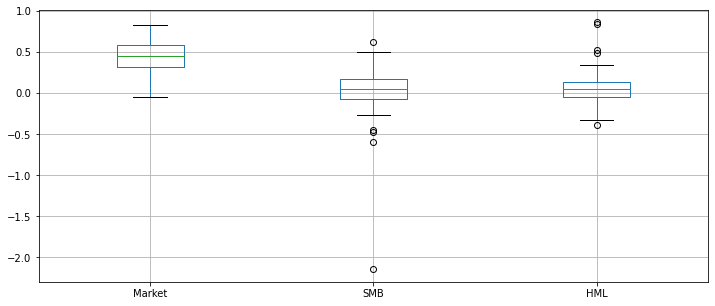

In [88]:
sml_df[['Market', 'SMB', 'HML']].boxplot(figsize=(12,5))

In [89]:
rslt = sm.ols(formula= "Exp_Ret ~ Market  + SMB + HML", data=sml_df).fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Exp_Ret   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     6.628
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           0.000450
Time:                        15:47:11   Log-Likelihood:                -7.4287
No. Observations:                  88   AIC:                             22.86
Df Residuals:                      84   BIC:                             32.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2726      0.066     -4.117      0.000      -0.404      -0.141
Market         0.3997      0.140      2.847      0.006       0.121       0.679
SMB           -0.2781      0.103     -2.713      0.008      -0.482      -0.074
HML           -0.4533      0.150     -3.031      0.003      -0.751      -0.156
==============================================================================
Omnibus:                        7.580   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.244
Skew:                          -0.570   Prob(JB):                       0.0267
Kurtosis:                       3.823   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
print(rslt.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &     Exp\_Ret     & \textbf{  R-squared:         } &     0.191   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.163   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     6.628   \\
\textbf{Date:}             & Sat, 10 Sep 2022 & \textbf{  Prob (F-statistic):} &  0.000450   \\
\textbf{Time:}             &     15:47:12     & \textbf{  Log-Likelihood:    } &   -7.4287   \\
\textbf{No. Observations:} &          88      & \textbf{  AIC:               } &     22.86   \\
\textbf{Df Residuals:}     &          84      & \textbf{  BIC:               } &     32.77   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


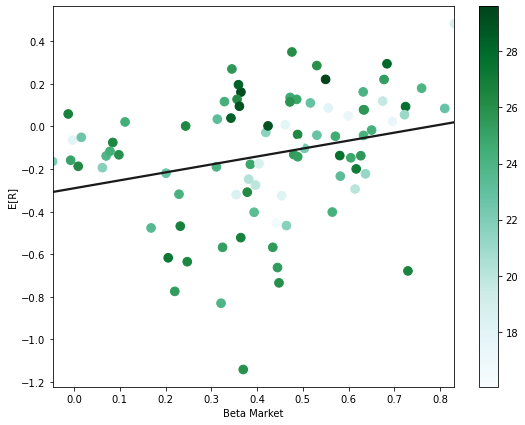

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


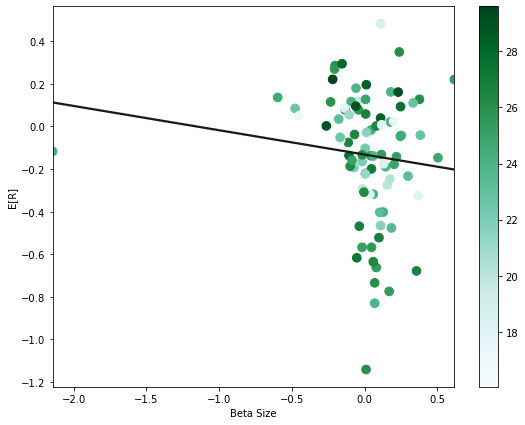

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


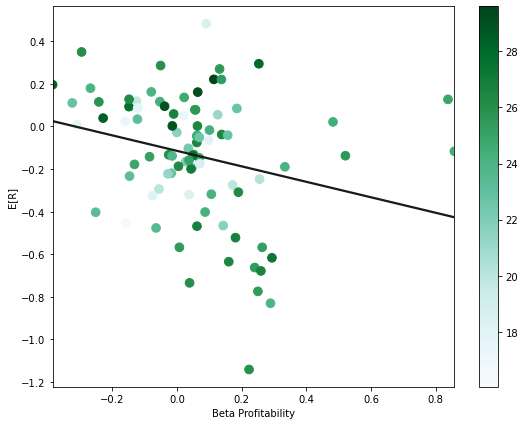

In [92]:
plt.figure(figsize=(9,7))
points = plt.scatter(sml_df['Market'], sml_df['Exp_Ret'], c=np.log(tvl[ff_defi].sum(axis=0)), s=75, cmap='BuGn')
plt.colorbar(points)
sns.regplot(sml_df['Market'], sml_df['Exp_Ret'], scatter=False, ci=False, color=".1")
#for i, txt in enumerate(sml_df.index):
#    plt.annotate(txt, (sml_df['Exp_Ret'][i], sml_df['Market'][i]))
plt.xlabel('Beta Market')
plt.ylabel('E[R]')
plt.show()

plt.figure(figsize=(9,7))
points = plt.scatter(sml_df['SMB'], sml_df['Exp_Ret'], c=np.log(tvl[ff_defi].sum(axis=0)), s=75, cmap='BuGn')
plt.colorbar(points)
sns.regplot( sml_df['SMB'], sml_df['Exp_Ret'],scatter=False, ci=False, color=".1")
#for i, txt in enumerate(sml_df.index):
#    plt.annotate(txt, (sml_df['Exp_Ret'][i], sml_df['Market'][i]))
plt.xlabel('Beta Size')
plt.ylabel('E[R]')
plt.show()


plt.figure(figsize=(9,7))
points = plt.scatter(sml_df['HML'], sml_df['Exp_Ret'], c=np.log(tvl[ff_defi].sum(axis=0)), s=75, cmap='BuGn')
plt.colorbar(points)
sns.regplot(sml_df['HML'], sml_df['Exp_Ret'], scatter=False, ci=False, color=".1")
#for i, txt in enumerate(sml_df.index):
#    plt.annotate(txt, (sml_df['Exp_Ret'][i], sml_df['Market'][i]))
plt.xlabel('Beta Profitability')
plt.ylabel('E[R]')
plt.show()


# Robust risk premia - Fama Mc Beth

In [93]:
# if out of mania, use mask
mask = (ff.index < '2020-07') | (ff.index > '2021-07')

fmb_reg = ff[ff_defi]
fmb_reg.index = ['t'+str(i) for i in range(len(fmb_reg.index))] #issues with statsmodels so transform to str
fmb_reg = fmb_reg.append(sml_df['Market'])
fmb_reg = fmb_reg.append(sml_df['SMB'])
fmb_reg = fmb_reg.append(sml_df['HML'])
#fmb_reg = fmb_reg.append(sml_df['VMS'])
#fmb_reg = fmb_reg.append(sml_df['IML'])
fmb_reg

,ARMOR,KSP,MTA,BNC,PERP,HARD,TRU,LDO,BABY,DODO,...,YFI,FEI,NFTX,KEEP,MDX,ALPHA,SUSHI,REN,EPS,BIFI
t0,0.00000,0.00000,0.00000,-0.01875,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14073,0.00000,0.00000
t1,0.00000,0.00000,0.00000,-0.01481,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.27325,0.00000,0.00000
t2,0.00000,0.00000,0.00000,0.01533,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06213,0.00000,0.00000
t3,0.00000,0.00000,0.00000,-0.07360,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00758,0.00000,0.00000
t4,0.00000,0.00000,0.00000,0.03219,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.09559,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t184,0.15281,0.00126,0.10769,-0.02782,0.08999,0.08526,0.07155,0.88738,-0.01588,0.12992,...,0.00587,0.00728,0.22606,-0.02606,0.12573,0.05588,0.27674,0.01965,-0.03370,0.12848
t185,0.13427,0.10444,0.06551,0.04400,0.08995,0.06496,0.09501,0.18141,-0.09307,0.05778,...,0.11644,-0.00677,0.13686,0.11134,0.00345,0.11938,-0.05269,0.09826,0.01311,0.18460
Market,0.44784,0.31110,0.56427,-0.04694,0.50347,0.38518,0.48000,0.34286,0.22935,0.63185,...,0.68385,-0.01279,0.51643,0.48878,0.24738,0.75958,0.59910,0.72215,0.36430,0.46161
SMB,0.06857,0.14431,0.12757,-0.01784,0.00342,0.20212,0.11487,0.10933,0.05945,0.17907,...,-0.15548,0.00643,0.33299,0.21830,0.05874,-0.05967,-0.45197,-0.10634,0.09810,0.11674


In [94]:
fmb_reg = fmb_reg.transpose() #prepare for regressions

In [95]:
fmb_rslt = pd.DataFrame(index=fmb_reg.columns[:-3], columns=['Intercept', 'Intercept_SE',
                                                'Market', 'Market_SE',
                                                'SMB', 'SMB_SE',
                                                'HML', 'HML_SE',
                                                #'VMS', 'VMS_SE',
                                                #'IML', 'IML_SE',
                                               ])

for i in fmb_reg.columns[:-3]: 
    try:
        result = sm.ols(formula= i+" ~ Market + SMB + HML", data=fmb_reg).fit()
        fmb_rslt['Intercept'][i] = result.params[0]
        fmb_rslt['Market'][i] = result.params[1]
        fmb_rslt['SMB'][i] = result.params[2]
        fmb_rslt['HML'][i] = result.params[3]
        #fmb_rslt['VMS'][i] = result.params[4]
        #fmb_rslt['IML'][i] = result.params[5]
        
        fmb_rslt['Intercept_SE'][i] = result.HC0_se[0]
        fmb_rslt['Market_SE'][i] = result.HC0_se[1]
        fmb_rslt['SMB_SE'][i] = result.HC0_se[2]
        fmb_rslt['HML_SE'][i] = result.HC0_se[3]
        #fmb_rslt['VMS_SE'][i] = result.HC0_se[4]
        #fmb_rslt['IML_SE'][i] = result.HC0_se[5]
    except:
        pass
    
print(fmb_rslt.shape)   
fmb_rslt.head()

(186, 8)


,Intercept,Intercept_SE,Market,Market_SE,SMB,SMB_SE,HML,HML_SE
t0,-0.01640,0.01469,0.04722,0.03799,-0.07149,0.05460,0.00785,0.04012
t1,0.00524,0.01900,-0.07202,0.05350,0.26291,0.10857,-0.09516,0.05766
t2,-0.01904,0.00916,0.05582,0.03625,-0.01011,0.01938,0.01934,0.01169
t3,-0.02989,0.01222,0.06307,0.02497,-0.02569,0.01735,0.00604,0.01245
t4,0.02506,0.00933,-0.06265,0.02326,-0.02020,0.01227,0.00867,0.00914


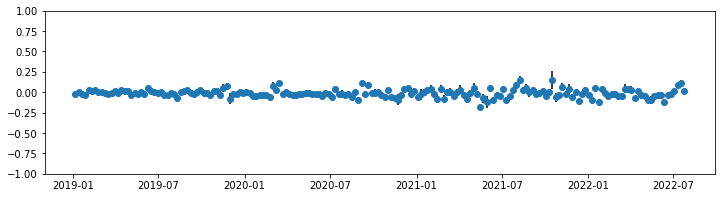

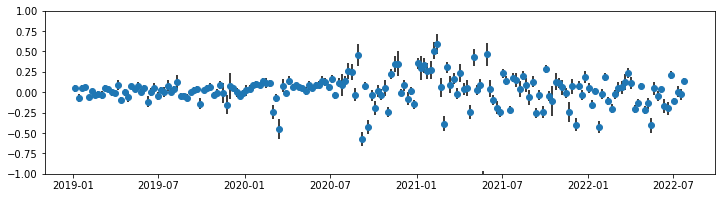

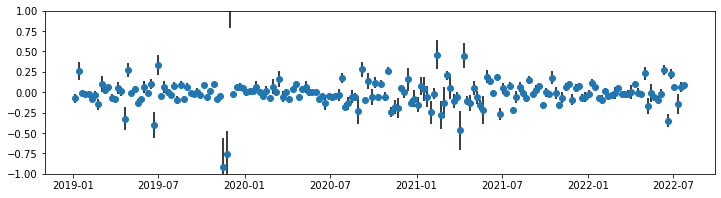

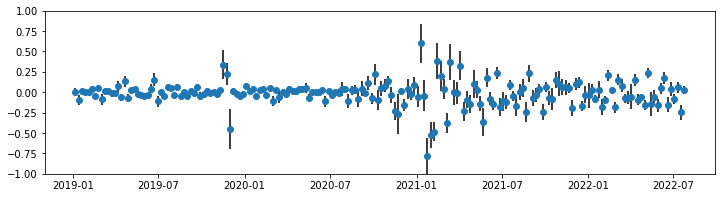

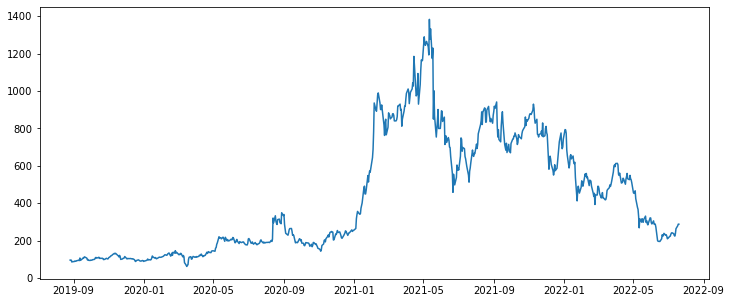

In [96]:

# WITHOUT MASK

plt.figure(figsize=(12,3))
plt.errorbar(x=ff[ff_defi].index, y='Intercept', yerr='Intercept_SE', data=fmb_rslt, fmt='o', ecolor='black')
plt.ylim(-1,1)
#plt.title('Intercept')
plt.show()

plt.figure(figsize=(12,3))
plt.errorbar(x=ff[ff_defi].index, y='Market', yerr='Market_SE', data=fmb_rslt, fmt='o', ecolor='black')
#plt.title('Market')
plt.ylim(-1,1)
plt.show()

plt.figure(figsize=(12,3))
plt.errorbar(x=ff[ff_defi].index, y='SMB', yerr='SMB_SE', data=fmb_rslt, fmt='o', ecolor='black')
#plt.title('Size')
plt.ylim(-1,1)
plt.show()

plt.figure(figsize=(12,3))
plt.errorbar(x=ff[ff_defi].index, y='HML', yerr='HML_SE', data=fmb_rslt, fmt='o', ecolor='black')
#plt.title('Profit')
plt.ylim(-1,1)
plt.show()

#plt.figure(figsize=(12,5))
#plt.errorbar(x=ff[ff_defi].index, y='VMS', yerr='VMS_SE', data=fmb_rslt, fmt='o', ecolor='black')
#plt.title('Volatility')
#plt.ylim(-100,100)
#plt.show()

#plt.figure(figsize=(12,5))
#plt.errorbar(x=ff[ff_defi].index, y='IML', yerr='IML_SE', data=fmb_rslt, fmt='o', ecolor='black')
#plt.title('Liquidity')
#plt.ylim(-1,1)
#plt.show()


plt.figure(figsize=(12,5))
plt.plot(df_index)
#plt.title('Index')
plt.show()

In [59]:
# Fama Mc Beth result: 

fama_mcbeth = pd.DataFrame(index=['Intercept', 'Market', 'SMB',
                                  'HML',
                                  #'VMS',
                                  #'IML'
                                 ], 
                          columns=['Estimate', 'SE', 't-val', 'p-val'])

for i in fmb_rslt.columns[::2]:
    n = len(fmb_rslt[i])-1
    estimate = fmb_rslt[i].mean()
    se = fmb_rslt[i].std()/(np.sqrt(n))
    tval = estimate/se
    pval = ss.t.sf(np.abs(tval), n)*2
    fama_mcbeth.loc[i] = [estimate, se, tval, pval]
    
fama_mcbeth

,Estimate,SE,t-val,p-val
Intercept,-0.01078,0.00386,-2.79454,0.00575
Market,0.01781,0.01200,1.48485,0.13928
SMB,-0.00032,0.01657,-0.01915,0.98474
HML,-0.00480,0.01126,-0.42613,0.67051


In [60]:
print(fama_mcbeth.to_latex(bold_rows=True, caption='FamaMcBeth'))

\begin{table}
\centering
\caption{FamaMcBeth}
\begin{tabular}{lllll}
\toprule
{} & Estimate &      SE &    t-val &   p-val \\
\midrule
\textbf{Intercept} & -0.01078 & 0.00386 & -2.79454 & 0.00575 \\
\textbf{Market   } &  0.01781 & 0.01200 &  1.48485 & 0.13928 \\
\textbf{SMB      } & -0.00032 & 0.01657 & -0.01915 & 0.98474 \\
\textbf{HML      } & -0.00480 & 0.01126 & -0.42613 & 0.67051 \\
\bottomrule
\end{tabular}
\end{table}



# Print summary stats

In [34]:
des_defi = (ff
            [ff_defi]
            .describe()
            .append(ff.kurtosis(), ignore_index=True)
            .append(ff.skew(), ignore_index=True)
            .set_axis(['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max', 'Kurtosis', 'Skewness'])
            .mean(axis=1)
)

des_factors = (
    ff
    .describe()
    .append(ff.kurtosis(), ignore_index=True)
    .append(ff.skew(), ignore_index=True)
    .set_axis(['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max', 'Kurtosis', 'Skewness'])
    [['Market', 'SMB', 'HML']]
)

des_factors['Defis'] =  des_defi
des_factors

,Market,SMB,HML,Defis
count,186.00000,186.00000,186.00000,186.00000
mean,0.00591,-0.01160,-0.01107,-0.00298
std,0.13398,0.09031,0.10003,0.17395
min,-0.52062,-0.37623,-0.63225,-0.81279
25%,-0.05626,-0.04423,-0.01035,-0.02956
median,0.00000,-0.01251,0.00000,-0.00059
75%,0.08340,0.02657,0.00000,0.02375
max,0.50343,0.52093,0.47440,0.91972
Kurtosis,2.73817,7.74530,18.95651,13.54434
Skewness,-0.20970,0.60716,-2.25403,0.58247


In [35]:
print(des_factors.transpose().to_latex(bold_rows=True, caption='Descriptive stats'))

\begin{table}
\centering
\caption{Descriptive stats}
\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &     count &     mean &     std &      min &      25\% &   median &     75\% &     max &  Kurtosis &  Skewness \\
\midrule
\textbf{Market} & 186.00000 &  0.00591 & 0.13398 & -0.52062 & -0.05626 &  0.00000 & 0.08340 & 0.50343 &   2.73817 &  -0.20970 \\
\textbf{SMB   } & 186.00000 & -0.01160 & 0.09031 & -0.37623 & -0.04423 & -0.01251 & 0.02657 & 0.52093 &   7.74530 &   0.60716 \\
\textbf{HML   } & 186.00000 & -0.01107 & 0.10003 & -0.63225 & -0.01035 &  0.00000 & 0.00000 & 0.47440 &  18.95651 &  -2.25403 \\
\textbf{Defis } & 186.00000 & -0.00298 & 0.17395 & -0.81279 & -0.02956 & -0.00059 & 0.02375 & 0.91972 &  13.54434 &   0.58247 \\
\bottomrule
\end{tabular}
\end{table}



## Additional Graphs - Sorting of portfolios & expected returns

<AxesSubplot:>

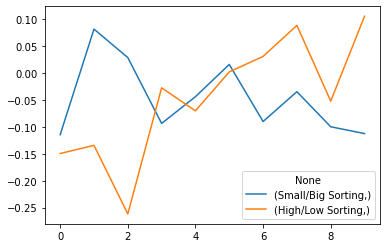

In [61]:
# Big and Small based on mktcap
ff_graph = pd.DataFrame(columns=[['Small/Big Sorting', 'High/Low Sorting']])

#ff_mktcap = pd.DataFrame(df_mc.mean())
ff_mktcap = pd.DataFrame(tvl[ff_defi].mean())
ordered_list_mc = list(ff_mktcap[0].dropna().sort_values(ascending=True).index)
small_1 = ordered_list_mc[:int(0.1*len(ordered_list_mc))]
small_2 = ordered_list_mc[int(0.1*len(ordered_list_mc)):int(0.2*len(ordered_list_mc))]
small_3 = ordered_list_mc[int(0.2*len(ordered_list_mc)):int(0.3*len(ordered_list_mc))]
small_4 = ordered_list_mc[int(0.3*len(ordered_list_mc)):int(0.4*len(ordered_list_mc))]
small_5 = ordered_list_mc[int(0.4*len(ordered_list_mc)):int(0.5*len(ordered_list_mc))]
small_6 = ordered_list_mc[int(0.5*len(ordered_list_mc)):int(0.6*len(ordered_list_mc))]
small_7 = ordered_list_mc[int(0.6*len(ordered_list_mc)):int(0.7*len(ordered_list_mc))]
small_8 = ordered_list_mc[int(0.7*len(ordered_list_mc)):int(0.8*len(ordered_list_mc))]
small_9 = ordered_list_mc[int(0.8*len(ordered_list_mc)):int(0.9*len(ordered_list_mc))]
small_10 = ordered_list_mc[int(0.9*len(ordered_list_mc)):]

ff_graph['Small/Big Sorting'] = [rt[small_1].mean(axis=1).mean(),
                                 rt[small_2].mean(axis=1).mean(),
                                 rt[small_3].mean(axis=1).mean(),
                                 rt[small_4].mean(axis=1).mean(),
                                 rt[small_5].mean(axis=1).mean(),
                                 rt[small_6].mean(axis=1).mean(),
                                 rt[small_7].mean(axis=1).mean(),
                                 rt[small_8].mean(axis=1).mean(),
                                 rt[small_9].mean(axis=1).mean(),
                                 rt[small_10].mean(axis=1).mean()
                                ]


# High medium low based on the valuation ratio
ff_ratio = pd.DataFrame(tvl[ff_defi].mean()/df_mc[ff_defi].mean())
ff_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
ff_ratio_list = list(ff_ratio.dropna().sort_values(by=0, ascending=False).index)

high_1 = ff_ratio_list[:int(0.1*len(ff_ratio_list))]
high_2 = ff_ratio_list[int(0.1*len(ff_ratio_list)):int(0.2*len(ff_ratio_list))]
high_3 = ff_ratio_list[int(0.2*len(ff_ratio_list)):int(0.3*len(ff_ratio_list))]
high_4 = ff_ratio_list[int(0.3*len(ff_ratio_list)):int(0.4*len(ff_ratio_list))]
high_5 = ff_ratio_list[int(0.4*len(ff_ratio_list)):int(0.5*len(ff_ratio_list))]
high_6 = ff_ratio_list[int(0.5*len(ff_ratio_list)):int(0.6*len(ff_ratio_list))]
high_7 = ff_ratio_list[int(0.6*len(ff_ratio_list)):int(0.7*len(ff_ratio_list))]
high_8 = ff_ratio_list[int(0.7*len(ff_ratio_list)):int(0.8*len(ff_ratio_list))]
high_9 = ff_ratio_list[int(0.8*len(ff_ratio_list)):int(0.9*len(ff_ratio_list))]
high_10 = ff_ratio_list[int(0.9*len(ff_ratio_list)):]

ff_graph['High/Low Sorting'] = [rt[high_1].mean(axis=1).mean(),
                                 rt[high_2].mean(axis=1).mean(),
                                 rt[high_3].mean(axis=1).mean(),
                                 rt[high_4].mean(axis=1).mean(),
                                 rt[high_5].mean(axis=1).mean(),
                                 rt[high_6].mean(axis=1).mean(),
                                 rt[high_7].mean(axis=1).mean(),
                                 rt[high_8].mean(axis=1).mean(),
                                 rt[high_9].mean(axis=1).mean(),
                                rt[high_10].mean(axis=1).mean()
                                ]

ff_graph*=100

#ff_growth = rt[low].mean(axis=1)
#ff_value = rt[high].mean(axis=1)
#

ff_graph.plot()


In [116]:
pd.DataFrame([rt[high_1].mean(axis=1), rt[high_2].mean(axis=1),
                                 rt[high_3].mean(axis=1),
                                 rt[high_4].mean(axis=1),
                                 rt[high_5].mean(axis=1),
                                 rt[high_6].mean(axis=1),
                                 rt[high_7].mean(axis=1),
                                 rt[high_8].mean(axis=1),
                                 rt[high_9].mean(axis=1),
                                 rt[high_10].mean(axis=1)
                                ]).transpose().cumsum().hvplot(figsize=(12,7))

:NdOverlay   [Variable]
   :Curve   [Unnamed: 0]   (value)

In [134]:
pd.DataFrame([rt[small_1].mean(axis=1)*100,
                                 rt[small_10].mean(axis=1)*100
                                ]).transpose().hvplot.hist(bins=300)

:NdOverlay   [Element]
   :Histogram   [1]   (1_count)

In [135]:
ff_ratio_list[int(0.9*len(ff_ratio_list)):]

['CRV', 'PNT', 'PICKLE', 'UMA', 'UNI', 'RUNE', 'ANKR', 'BADGER', 'SUSHI']